 # Experiment 2: Binary classification

Content

1. Introduction
2. Used libraries
3. Reading Clean Data from a CSV File
4. Case of study and data understanding
5. Split the data
6. Data Scaling
    
    6.1 Data Standardisation
    
    6.2 Data Normalisation
    
    
7. Assess Baseline Model
8. Training a model
    
    8.1 KNN Classifier default
    
    8.2 KNN Classifier with different hyperparameters values n_neighbors=10
    
    8.3 KNN Classifier with elbow method for n_neighbors
    
    8.4 KNN Classifier with PCA and elbow method for dimensionality reduction
    
    
9. Conclusion
10. References

## 1. Introduction

In the following study, we will fit a binary classification model using KNN classifier to predict if an existing customer is more likely to buy a new car as accurate as possible.

## 2. Used libraries 

In [2]:
#working with data
import pandas as pd
import numpy as np

#plotting data
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 3. Reading Clean Data from a CSV File

Raw data:

In [4]:
df = pd.read_csv('repurchase_training.csv')

In [5]:
df

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


Clean data:

We will use features based on One hot encoding and then apply them scaling techniques.

In [6]:
df_cleaned = pd.read_csv("df_cleaned2.csv")
#clean columns
df_cleaned.drop(df_cleaned.columns[0], axis=1, inplace=True)

In [7]:
df_cleaned.shape

(131337, 37)

In [8]:
df_cleaned

,Target,age_band,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,model_18,model_19,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,0,3,9,2,10,3,7,5,6,9,...,0,0,0,0,0,0,0,0,0,0
1,0,0,6,10,3,10,4,9,10,6,...,0,0,1,0,0,0,0,0,0,0
2,0,0,9,10,9,10,9,10,10,7,...,0,0,0,1,0,0,0,0,0,0
3,0,0,5,8,5,8,4,5,6,4,...,0,0,0,1,0,0,0,0,0,0
4,0,0,8,9,4,10,7,9,8,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,0,7,10,10,9,10,10,10,3,...,0,0,0,1,0,0,0,0,0,0
131333,1,0,4,10,10,10,10,10,10,2,...,0,0,0,1,0,0,0,0,0,0
131334,1,0,4,4,9,5,4,3,8,4,...,0,0,0,0,0,1,0,0,0,0
131335,1,0,2,1,10,1,10,9,8,3,...,0,0,0,0,0,1,0,0,0,0


## 4. Case of study and data understanding 

**[4.1]** Hypothesis

The case study has the following hypothesis:
We will train a KNN model to predict if an existing customer is more likely to buy a new car. Assuming that the algorithm will perform better if the classes are far apart enough.

## 5. Split the data 

**[5.1]** Split data and test

Stratify=y will be used to distribute the data for train, valid and test proportionally, preserving the distribution of the two classes (Brownlee, 2020a), (Brownlee, 2020d).

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_cleaned.columns

Index(['Target', 'age_band', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'Male', 'LCV', 'Large/SUV', 'Other',
       'Small/Medium', 'model_1', 'model_10', 'model_11', 'model_12',
       'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18',
       'model_19', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6',
       'model_7', 'model_8', 'model_9'],
      dtype='object')

In [11]:
X = df_cleaned[['age_band', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'Male', 'LCV', 'Large/SUV', 'Other',
       'Small/Medium', 'model_1', 'model_10', 'model_11', 'model_12',
       'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18',
       'model_19', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6',
       'model_7', 'model_8', 'model_9']].values
y = df_cleaned['Target'].values

In [12]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
X_data.shape

(105069, 36)

In [14]:
y_data.shape

(105069,)

In [15]:
X_test.shape

(26268, 36)

In [16]:
y_test.shape

(26268,)

**[5.2]** Split train and validation

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(84055, 36)
(21014, 36)
(26268, 36)
(84055,)
(21014,)
(26268,)


**[5.3]** Count classes

In [19]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

In [20]:
np.unique(y_val, return_counts=True)

(array([0, 1], dtype=int64), array([20449,   565], dtype=int64))

In [21]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([25564,   704], dtype=int64))

The count per label indicates that we are preserving the class distribution with 2,7% values class 1 over class 0.

## 6.  Data Scaling

We will perform a data scaling to prevent an increased bias in the model in a specific range of values. We will have two scaling approaches: Normalisation and Standardisation. (Arsik36, 2020), (Kapkar, 2020)

**[6.1]** Data Standardisation

"The Standardisation technique is used to center the feature columns at mean 0 with a standard deviation of 1 so that the feature columns have the same parameters as a standard normal distribution. Unlike Normalization, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values. Here is the formula for standardization." (Kumar, 2020)

"Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results." (Brownlee, 2020c)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [24]:
scaled = scaler.transform(X_train)
scaled

array([[ 3.69027246, -0.5248133 , -1.54443936, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327, -0.17332784,  1.2296538 , ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327,  1.58409941, -0.15739278, ..., -0.25852803,
        -0.22682549, -0.08655235],
       ...,
       [-0.37610327,  1.58409941,  0.53613051, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327,  0.88112851, -0.85091607, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327, -1.57926965, -1.19767771, ..., -0.25852803,
        -0.22682549, -0.08655235]])

**[6.2]** Data Normalisation

"Normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. To normalize the data, the min-max scaling can be applied to one or more feature columns" (Kumar, 2020)

With this method, we will lose information from the data, like outliers. However, it is not a problem in the current study.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler_norm = MinMaxScaler()
scaler_norm.fit(X_train)

MinMaxScaler()

In [27]:
scaled_norm = scaler_norm.transform(X_train)
scaled_norm

array([[0.85714286, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.44444444, 0.88888889, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.77777778, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ]])

**[6.3]** Replace features with scaler

In [28]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [29]:
X_train_norm = scaler_norm.transform(X_train)
X_val_norm = scaler_norm.transform(X_val)
X_test_norm = scaler_norm.transform(X_test)

## 7. Assess Baseline Model

This study will use F2 score. The reason behind the metric selection is based on the highly imbalanced dataset and the fact that we care more about positive class for the purpose of the prediction (Czakon, 2022) (Malato, 2021) and (Olugbenga, 2022). 

We want the prediction of repurchases to be as correct as possible and avoid false negative predictions (type II error) where the campaigns can lose potential clients. Moreover, we will prevent excessive type I error by predicting false potential clients.

This phenomenon could occur easily in this dataset due to the unbalanced classes in the study. (Brownlee, 2020a)(Brownlee, 2020b)


**[7.1]** base model

In [30]:
from statistics import mode

In [43]:
y_mode = mode(y_train)
y_mode

0

In [44]:
y_train.shape

(84055,)

In [45]:
y_base = np.full(y_train.shape, y_mode)

In [46]:
y_base

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
y_base.shape

(84055,)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [49]:
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))
print(precision_score(y_train, y_base))
print(recall_score(y_train, y_base))
print(average_precision_score(y_train, y_base))
print(fbeta_score(y_train, y_base, beta=2, pos_label=1, average='binary'))

0.9732080185592766
0.9599939169916978
0.0
0.0
0.026791981440723336
0.0


**[7.2]** confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
results = confusion_matrix(y_train, y_base)
print(results)

[[81803     0]
 [ 2252     0]]


**[7.3]** Count classes

In [52]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

## 8. Training a model

Based on: (scikit-learn developers, 2023) and (So, 2023)  

note: 

When k=1 in KNN, the closest point is the actual data. In conclusion, the prediction will always be perfect. (David, 2019)

**[8.1]** KNN Classifier

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_default_class = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [55]:
knn_default_class.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [56]:
y_train_preds_knn = knn_default_class.predict(X_train)

In [57]:
#score for the train set
print(accuracy_score(y_train, y_train_preds_knn))
print(f1_score(y_train, y_train_preds_knn, average='weighted'))
print(precision_score(y_train, y_train_preds_knn))
print(recall_score(y_train, y_train_preds_knn))
print(average_precision_score(y_train, y_train_preds_knn))
print(fbeta_score(y_train, y_train_preds_knn, beta=2, pos_label=1, average='binary'))

0.9878650883350187
0.9864405317081778
0.946376811594203
0.5799289520426287
0.5600858483059294
0.6286099345398536


In [58]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds_knn)
print(results)

[[81729    74]
 [  946  1306]]


In [59]:
#precision-recall auc curve
probs = knn_default_class.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('KNN PR AUC: %.3f' % auc_score)

KNN PR AUC: 0.920


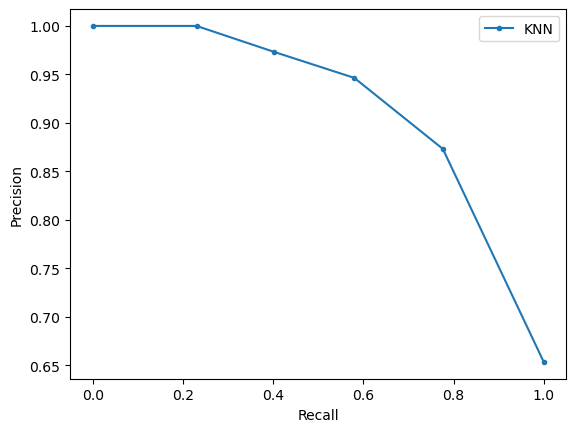

In [60]:
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='KNN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [61]:
#score for the validation set
y_val_preds = knn_default_class.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9851527553059864
0.9829152130732843
0.9230769230769231
0.48849557522123893
0.46467172878297025
0.5392731535756154


In [62]:
#precision-recall auc curve
probs = knn_default_class.predict_proba(X_val)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_val, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('KNN PR AUC: %.3f' % auc_score)

KNN PR AUC: 0.770


In [63]:
#score for the test set
y_test_preds = knn_default_class.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9839348256433683
0.9814111404267399
0.8895027624309392
0.45738636363636365
0.42138884296755835
0.5066079295154186


In [64]:
#precision-recall auc curve
probs = knn_default_class.predict_proba(X_test)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('KNN PR AUC: %.3f' % auc_score)

KNN PR AUC: 0.742


**[8.2]** KNN Classifier with different hyperparameters values n_neighbors=9

In [65]:
knn_class_9 = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

In [66]:
knn_class_9.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [67]:
y_train_preds_knn = knn_class_9.predict(X_train)

In [68]:
#score for the train set
print(accuracy_score(y_train, y_train_preds_knn))
print(f1_score(y_train, y_train_preds_knn, average='weighted'))
print(precision_score(y_train, y_train_preds_knn))
print(recall_score(y_train, y_train_preds_knn))
print(average_precision_score(y_train, y_train_preds_knn))
print(fbeta_score(y_train, y_train_preds_knn, beta=2, pos_label=1, average='binary'))

0.9851644756409493
0.982814132049974
0.9365768896611643
0.4786856127886323
0.46229292773807473
0.5305640318929028


In [69]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds_knn)
print(results)

[[81730    73]
 [ 1174  1078]]


In [70]:
#precision-recall auc curve
probs = knn_class_9.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('KNN PR AUC: %.3f' % auc_score)

KNN PR AUC: 0.879


**[8.3]** KNN Classifier with elbow method for n_neighbors

Based on: (DataCamp, 2023) (scikit-learn developers, 2023a, 2023b, 2023c)

In [88]:
k_values = [i for i in range (3,8,2)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_train_preds_knn = knn.predict(X_train)
    score = fbeta_score(y_train, y_train_preds_knn, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'f2 Score')

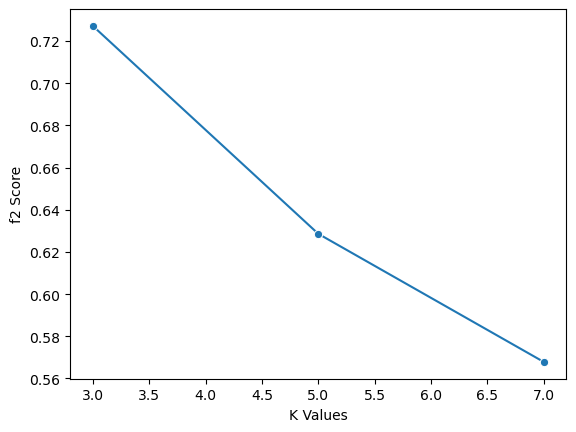

In [89]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("f2 Score")

In [90]:
scores

[0.7271872060206962, 0.6286099345398536, 0.5678602790516148]

best n_neighbors

In [33]:
knn_class_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [34]:
knn_class_3.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [35]:
y_train_preds_knn = knn_class_3.predict(X_train)

In [36]:
#score for the train set
print(accuracy_score(y_train, y_train_preds_knn))
print(f1_score(y_train, y_train_preds_knn, average='weighted'))
print(precision_score(y_train, y_train_preds_knn))
print(recall_score(y_train, y_train_preds_knn))
print(average_precision_score(y_train, y_train_preds_knn))
print(fbeta_score(y_train, y_train_preds_knn, beta=2, pos_label=1, average='binary'))

0.9906965677235143
0.9899579372133079
0.9531442663378545
0.6865008880994672
0.6627336477155746
0.7271872060206962


In [38]:
#score for the validation set
y_val_preds = knn_class_3.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9857238031788331
0.9840553939121541
0.8818443804034583
0.5415929203539823
0.4899257898693978
0.5868814729574223


In [39]:
#score for the test set
y_test_preds = knn_class_3.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9842393787117405
0.982169428087503
0.8571428571428571
0.4943181818181818
0.43725391024385996
0.5400372439478585


**[8.4]** KNN Classifier with PCA and elbow method for dimensionality reduction

Based on: (DataCamp, 2023) (scikit-learn developers, 2023a, 2023b, 2023c)

In [91]:
from sklearn.decomposition import PCA

pca=PCA(0.95)

In [92]:
X_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [93]:
pca.n_components_

25

In [94]:
k_values = [i for i in range (3,21,2)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_pca, y_train)
    y_train_preds_knn = knn.predict(X_pca)
    score = fbeta_score(y_train, y_train_preds_knn, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'f2 Score')

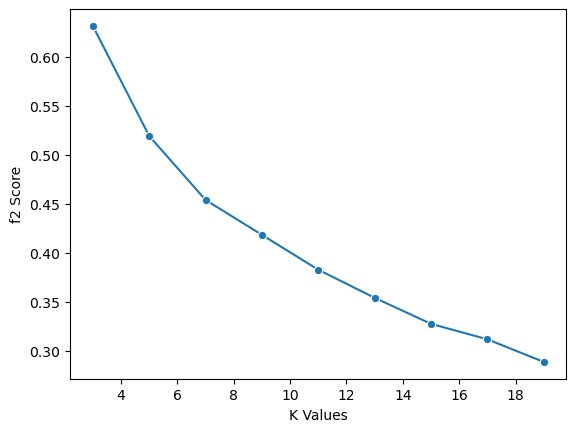

In [95]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("f2 Score")

In [96]:
scores

[0.6317844220148542,
 0.519398025994332,
 0.45409429280397023,
 0.41842263696568327,
 0.3828235770710959,
 0.35415817366490016,
 0.3275579249538651,
 0.3117604691840724,
 0.2886704604242111]

In [97]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

best_k

3

Model with best k (n_neighbors):

In [98]:
knn_class_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_class_best.fit(X_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [99]:
y_train_preds_knn = knn_class_best.predict(X_pca)

In [100]:
#score for the train set
print(accuracy_score(y_train, y_train_preds_knn))
print(f1_score(y_train, y_train_preds_knn, average='weighted'))
print(precision_score(y_train, y_train_preds_knn))
print(recall_score(y_train, y_train_preds_knn))
print(average_precision_score(y_train, y_train_preds_knn))
print(fbeta_score(y_train, y_train_preds_knn, beta=2, pos_label=1, average='binary'))

0.9870085063351377
0.985724053875243
0.8882195448460509
0.5892539964476021
0.5343916158274328
0.6317844220148542


In [101]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds_knn)
print(results)

[[81636   167]
 [  925  1327]]


In [102]:
#precision-recall auc curve
probs = knn_class_best.predict_proba(X_pca)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('KNN PR AUC: %.3f' % auc_score)

KNN PR AUC: 0.883


In [103]:
#score for the validation set
y_val_preds = knn_class_best.predict(X_val_pca)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9791567526410964
0.9764072271370753
0.6953846153846154
0.4
0.29428594856176465
0.4371373307543521


In [104]:
#precision-recall auc curve
probs = knn_class_best.predict_proba(X_val_pca)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_val, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('KNN PR AUC: %.3f' % auc_score)

KNN PR AUC: 0.567


In [105]:
#score for the test set
y_test_preds = knn_class_best.predict(X_test_pca)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.977615349474646
0.974340521465617
0.6526315789473685
0.3522727272727273
0.24726383111730907
0.3879849812265332


In [106]:
#precision-recall auc curve
probs = knn_class_best.predict_proba(X_test_pca)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('KNN PR AUC: %.3f' % auc_score)

KNN PR AUC: 0.520


## 9. Conclusion

Training with fewer features (PCA) was significantly faster and achieved better performance levels than logistic regression models.

KNN Classifier with elbow method, model [8.3] was the model that obtained the best performance with n_neighbors = 3. However, the score is still low.

Moreover, the model presents overfitting as its performance decreases in the validation and test data.

The decision is to continue experimenting with other models and different techniques to improve performance.

## 10. References

Arsik36. (2020, August 7). Answer to ‘Scaling of categorical variable’. Stack Overflow. https://stackoverflow.com/a/63304313

Brownlee, J. (2020a, January 5). ROC Curves and Precision-Recall Curves for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

Brownlee, J. (2020b, January 26). Cost-Sensitive Logistic Regression for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cost-sensitive-logistic-regression/

Brownlee, J. (2020c, June 9). How to Use StandardScaler and MinMaxScaler Transforms in Python. MachineLearningMastery.Com. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Brownlee, J. (2020d, January 12). How to Fix k-Fold Cross-Validation for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/

Czakon, J. (2022, July 21). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose? Neptune.Ai. https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

DataCamp. (2023, February 1). K-Nearest Neighbors (KNN) Classification with scikit-learn. https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

David. (2019, January 4). Answer to ‘Training error in KNN classifier when K=1’. Cross Validated. https://stats.stackexchange.com/a/385572

Kapkar. (2020). Which Machine Learning requires Feature Scaling(Standardization and Normalization)? And Which not? | Data Science and Machine Learning. https://www.kaggle.com/getting-started/a

Kumar, A. (2020, July 27). MinMaxScaler vs StandardScaler—Python Examples. Data Analytics. https://vitalflux.com/minmaxscaler-standardscaler-python-examples/

Malato, G. (2021, June 7). Precision, recall, accuracy. How to choose? Your Data Teacher. https://www.yourdatateacher.com/2021/06/07/precision-recall-accuracy-how-to-choose/

Olugbenga, M. (2022, July 22). Balanced Accuracy: When Should You Use It? Neptune.Ai. https://neptune.ai/blog/balanced-accuracy

scikit-learn developers. (2023a). 3.3. Metrics and scoring: Quantifying the quality of predictions. Scikit-Learn. https://scikit-learn.org/stable/modules/model_evaluation.html

scikit-learn developers. (2023b). Sklearn.model_selection.cross_val_score. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.model_selection.cross_val_score.html

scikit-learn developers. (2023c). Sklearn.neighbors.KNeighborsClassifier. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

So, A. (2023). Course Modules: 36106 Machine Learning Algorithms and Applications—Autumn 2023. Lab Solutions. https://canvas.uts.edu.au/courses/26202/modules

